# Advanced linear Regression Models with Python

## Robust linear Modelling

Here, we want to build on the example from session 6 to emulate the behaviour of R

/home/tobias_giesemann/.local/lib/python3.6/site-packages/plotnine/utils.py:54: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(val) and not is_string(val):
/home/tobias_giesemann/.local/lib/python3.6/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/home/tobias_giesemann/.local/lib/python3.6/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


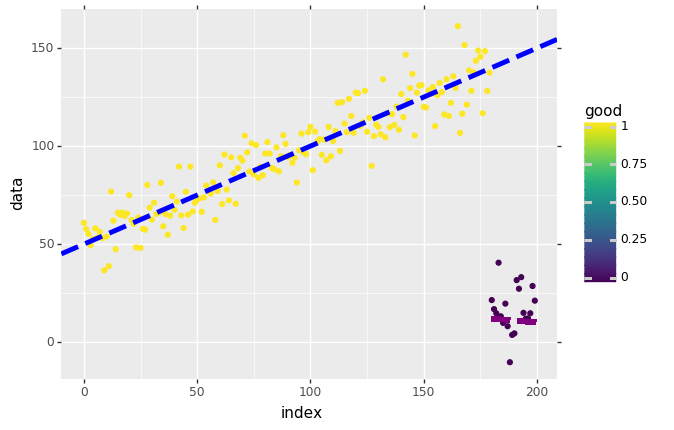

<ggplot: (8761243691065)>

In [59]:
import statsmodels.api as sm
import numpy as np
import pandas as pd
import random
import seaborn as sns
from matplotlib import pyplot as plt
from plotnine import *

random.seed(12354)

# make good data
good_data = np.array([50+0.5*x+ np.random.normal(0,10,1) for x in range(0,180)])

bad_data = np.array([20-0.1*x + np.random.normal(0,10,1) for x in range(0,20)])

data = pd.DataFrame(np.concatenate((good_data,bad_data)))
data = data.reset_index()
data.columns = ["index", "data"]
data.good = None
data.loc[data.index >=180, "good"] = 0
data.loc[data.index <180, "good"] = 1

#sns.lmplot("index", "data", data=data,fit_reg=True)

plot1 = (ggplot(data=data, 
        mapping = aes(x="index", y = "data"))
 + geom_point(mapping=aes(color="good"))
 + geom_abline(intercept=50,
             slope=0.5,
               linetype = "dashed",
              color="blue",
              size=2)
 + geom_segment(x = 180,
               y = 20 -0.1*80,
               xend=200,
               yend=20-0.1*100,
               color="purple",
                linetype="dashed",
               size=2)
)
plot1

                            OLS Regression Results                            
Dep. Variable:                   data   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     11.83
Date:                Thu, 25 Jul 2019   Prob (F-statistic):           0.000712
Time:                        18:59:53   Log-Likelihood:                -989.18
No. Observations:                 200   AIC:                             1982.
Df Residuals:                     198   BIC:                             1989.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     73.0660      4.817     15.167      0.0

/home/tobias_giesemann/.local/lib/python3.6/site-packages/plotnine/utils.py:54: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(val) and not is_string(val):
/home/tobias_giesemann/.local/lib/python3.6/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/home/tobias_giesemann/.local/lib/python3.6/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


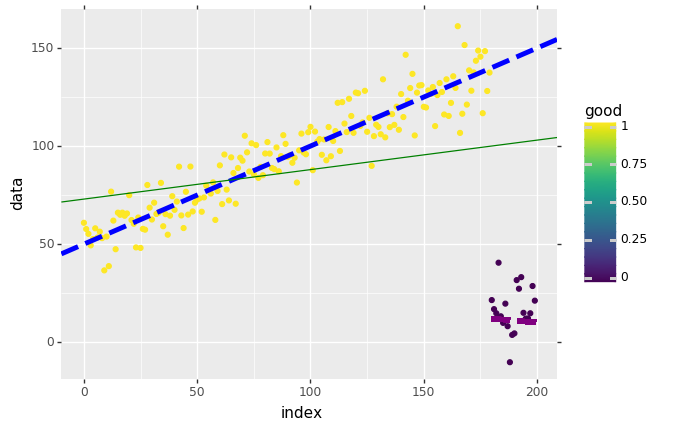

<ggplot: (-9223363275611110782)>

In [60]:
import statsmodels.formula.api as smf

lm1 = smf.ols('data ~ 1+index', data=data).fit()
print(lm1.summary())

plot2 = (plot1
         + geom_abline(intercept = 72.955,
                      slope=0.1504,
                      color = "green")
        )
plot2

                    Robust linear Model Regression Results                    
Dep. Variable:                   data   No. Observations:                  200
Model:                            RLM   Df Residuals:                      198
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Thu, 25 Jul 2019                                         
Time:                        18:59:57                                         
No. Iterations:                    33                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     56.5439      1.856     30.468      0.0

/home/tobias_giesemann/.local/lib/python3.6/site-packages/plotnine/utils.py:54: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(val) and not is_string(val):
/home/tobias_giesemann/.local/lib/python3.6/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/home/tobias_giesemann/.local/lib/python3.6/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


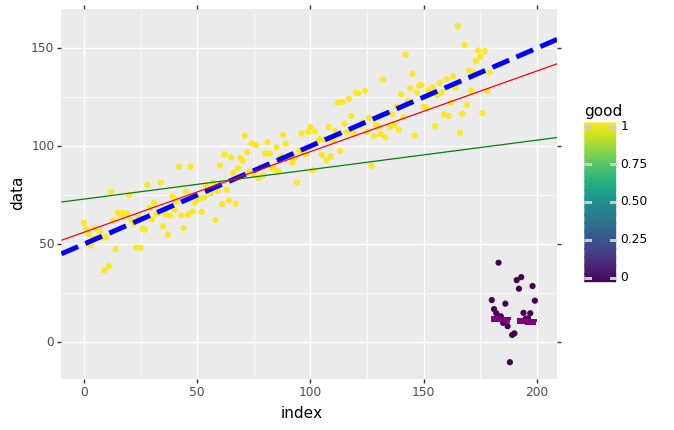

<ggplot: (-9223363275611159443)>

In [61]:
# import easy API
from statsmodels.formula.api import ols, rlm

# fit rlm model
rlm1 = rlm("data ~ index",data = data).fit()

# check summary
print(rlm1.summary())

# plot result
plot3 = (plot2
         + geom_abline(intercept = 56.0387,
                      slope=0.4115,
                      color = "red")
        )
plot3